# Capstone Project Module 3 - Customer Lifetime Value Prediction

**Nama:** Taufiq Bariz  

---

### 📘 Deskripsi Singkat
Proyek ini bertujuan untuk membangun model machine learning yang dapat memprediksi **Customer Lifetime Value (CLV)** berdasarkan data pelanggan. CLV adalah estimasi nilai total keuntungan yang dihasilkan dari seorang pelanggan selama hubungan bisnis berlangsung.

Model ini dapat membantu tim marketing dalam **menentukan pelanggan bernilai tinggi**, mengoptimalkan **strategi retensi pelanggan**, dan **meningkatkan efisiensi biaya promosi**.


## 💼 Business Problem & Data Understanding

### 🧩 Business Context
Sebuah perusahaan ingin memahami seberapa besar kontribusi jangka panjang (Customer Lifetime Value / CLV) dari setiap pelanggan mereka. Saat ini, strategi promosi dilakukan secara merata tanpa mempertimbangkan nilai pelanggan. Akibatnya, biaya marketing sering tidak efisien.

### 🎯 Business Problem
Perusahaan belum dapat mengidentifikasi pelanggan bernilai tinggi berdasarkan data historis mereka.

### 🎯 Business Objective
Membangun model machine learning untuk **memprediksi CLV** berdasarkan profil pelanggan, dengan tujuan:
- Menentukan pelanggan dengan kontribusi jangka panjang tertinggi.  
- Menjadi dasar keputusan **alokasi anggaran marketing** yang lebih efisien.  
- Membantu strategi **retensi pelanggan bernilai tinggi**.

### 👥 Stakeholder
- **Marketing Team:** Mengatur alokasi promosi berdasarkan prediksi CLV.  
- **Customer Relationship Team:** Menentukan prioritas layanan pelanggan bernilai tinggi.  
- **Manajemen:** Membuat keputusan strategis berbasis prediksi CLV pelanggan.

In [27]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import os

### 📊 Data Understanding
Dataset yang digunakan adalah *Customer Lifetime Value Dataset*, terdiri dari 11 kolom dan 5.669 baris.  
Setiap baris mewakili **satu pelanggan**, dengan fitur-fitur seperti:
- `Vehicle Class`, `Coverage`, `Education`, `Marital Status`, `EmploymentStatus` → variabel kategorikal  
- `Number of Policies`, `Monthly Premium Auto`, `Total Claim Amount`, `Income` → variabel numerik  
- `Customer Lifetime Value` → **target variabel (nilai yang diprediksi)**

In [28]:
# Load Data

df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


## EDA

In [29]:
# Melihat informasi data
# terdapat 2 type data object dan float
# tidak ditemukan nilai null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [30]:
# melihat ringkasan statistik kolom data numerik

df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [31]:
# Melihat jumlah unique values pada kolom kategorikal

print('\nUnique values (categorical cols):')
cat_cols = df.select_dtypes(include='object').columns.tolist()
for c in cat_cols:
    print(f"- {c}: {df[c].nunique()} unique values")


Unique values (categorical cols):
- Vehicle Class: 6 unique values
- Coverage: 3 unique values
- Renew Offer Type: 4 unique values
- EmploymentStatus: 5 unique values
- Marital Status: 3 unique values
- Education: 5 unique values


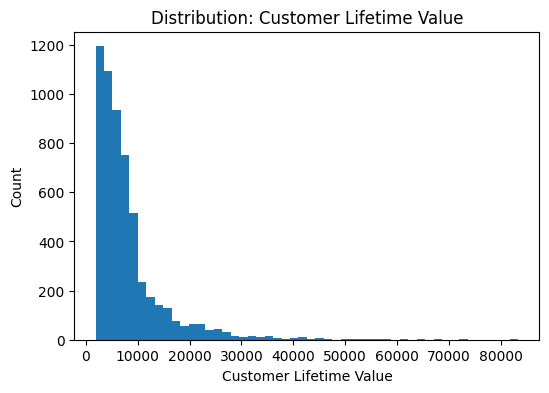

In [32]:
# Mengetahui bentuk, sebaran, dan karakteristik nilai Customer Lifetime Value
# Untuk menentukan strategi preprocessing dan interpretasi model dengan lebih tepat.

plt.figure(figsize=(6,4))
plt.hist(df['Customer Lifetime Value'], bins=50)
plt.title('Distribution: Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Count')
plt.show()

In [33]:
# Cek baris duplikat
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

# Jika ada duplikat dan ingin dihapus:
if duplicate_rows.shape[0] > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplikat dihapus. Jumlah baris setelah pembersihan:", df.shape[0])
else:
    print("Tidak ada duplikat yang ditemukan.")


Jumlah baris duplikat: 618
Duplikat dihapus. Jumlah baris setelah pembersihan: 5051


## 🧹 Data Cleaning & Feature Engineering

### 🧩 Data Cleaning
- Tidak ada nilai null (dicek di EDA).
- Baris duplikat sudah dibersihkan saat proses EDA   
- Tipe data sudah dikategorikan (kategorikal sebagai object, numerik sebagai float).

### 🧠 Feature Engineering & Preprocessing
- Kategorikal di-encode menggunakan **OneHotEncoder** (untuk menghindari multikolinearitas).  
- Variabel numerik discaling menggunakan **StandardScaler**.  
- Semua preprocessing dibungkus dalam **ColumnTransformer** dan Pipeline agar tidak terjadi data leakage.


In [34]:
# Menentukan features
target = 'Customer Lifetime Value'
feature_cols = [c for c in df.columns if c != target]

In [35]:
# Identifikasi kolom Numerik dan kolom Kategorikal
# Kita membagi kolom menjadi 2 kelompok kolom (kolom numerik dan kolok kategori)

num_cols = df[feature_cols].select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df[feature_cols].select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols

(['Number of Policies',
  'Monthly Premium Auto',
  'Total Claim Amount',
  'Income'],
 ['Vehicle Class',
  'Coverage',
  'Renew Offer Type',
  'EmploymentStatus',
  'Marital Status',
  'Education'])

In [36]:
# Membangun pipeline
num_pipe = Pipeline([('scaler', StandardScaler())])
cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'))])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

In [37]:
# Train-test split
X = df[feature_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (4040, 10) Test shape: (1011, 10)


## ⚙️ Analytics (Modeling & Evaluation)

Model yang diuji:
1. Linear Regression (baseline)
2. Random Forest 
3. XGBoost 

Metrik evaluasi: **MAE, RMSE, R², MAPE**. Model terbaik dipilih berdasarkan RMSE terkecil.


In [38]:
# --- MODELING & EVALUATION ---
from math import sqrt

def eval_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    # MAPE: handle division by zero
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true==0, 1e-9, y_true))) * 100
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

results = {}

In [39]:
# 1) Linear Regression
pipe_lr = Pipeline([('pre', preprocessor), ('model', LinearRegression())])
pipe_lr.fit(X_train, y_train)
pred_lr = pipe_lr.predict(X_test)
results['LinearRegression'] = eval_regression(y_test, pred_lr)
print('Linear Regression evaluated')

Linear Regression evaluated


In [40]:
# 2) Random Forest
pipe_rf = Pipeline([('pre', preprocessor), ('model', RandomForestRegressor(random_state=42, n_jobs=-1))])
pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
results['RandomForest'] = eval_regression(y_test, pred_rf)
print('Random Forest evaluated')

Random Forest evaluated


In [41]:
# 3) XGBoost
try:
    from xgboost import XGBRegressor
    pipe_xgb = Pipeline([('pre', preprocessor), ('model', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1))])
    pipe_xgb.fit(X_train, y_train)
    pred_xgb = pipe_xgb.predict(X_test)
    results['XGBoost'] = eval_regression(y_test, pred_xgb)
    print('XGBoost evaluated')
except Exception as e:
    print('XGBoost not available or failed to run. Skipping XGBoost. Error:', e)

XGBoost evaluated


In [42]:
# Hasil
res_df = pd.DataFrame(results).T
res_df = res_df[['MAE','RMSE','R2','MAPE']]
res_df

,MAE,RMSE,R2,MAPE
LinearRegression,3857.996601,6340.553847,0.155354,62.505519
RandomForest,1630.591165,4087.055124,0.649053,12.666555
XGBoost,2004.784079,4160.328001,0.636357,21.995609


In [43]:
# Pilih model terbaik dengan RMSE terendah
best_model_name = res_df['RMSE'].idxmin()
print('Best model:', best_model_name)

if best_model_name == 'LinearRegression':
    best_pipe = pipe_lr
elif best_model_name == 'RandomForest':
    best_pipe = pipe_rf
elif best_model_name == 'XGBoost':
    best_pipe = pipe_xgb
else:
    best_pipe = pipe_rf

Best model: RandomForest


In [44]:
# setelah kita mendaatkan model RandomForest sebagai model terbaik, kita simpan model RandomForest

import joblib

# Kita simpan model di folder yang sama dengan file CSV
joblib.dump(pipe_rf, 'model_capstone_project_modul3.pkl')

# print("Model berhasil disimpan di folder yang sama dengan dataset kamu.")


['model_capstone_project_modul3.pkl']

In [45]:
# model dikompres ke bentuk lzma karna bentuk pkl terlalu besar

import compress_pickle as cpkl

cpkl.dump(pipe_rf, 'model_capstone_project_modul3.pkl.lzma', compression='lzma')


## 🌟 Feature Importance
- Pada bagian ini kita akan melihat seberapa besar pengaruh setiap fitur terhadap prediksi CLV
- Dengan kata lain kita akan megetahui fitur mana yang paling berperan dalam menentukan CLV pelanggan

In [46]:
# Kita extract fitur yang sudah kita proses pada pipeline sebelumnya
from sklearn.inspection import permutation_importance

# Ambil model RandomForest yang sudah dilatih di pipeline sebelumnya
rf_for_feat = pipe_rf   # model yang sudah di latih pada tahap sebelumnya

# Ambil nama fitur setelah melalui proses preprocessing
# numeric feature names - nama dari fitur numerik
num_features = num_cols
# onehot feature names → nama fitur kategori yang sudah diubah jadi dummy variables lewat OneHotEncoder
ohe = preprocessor.named_transformers_['cat'].named_steps['ohe']
ohe_features = []
try:
    # Untuk versi sklearn >= 1.0, gunakan get_feature_names_out
    ohe_features = list(ohe.get_feature_names_out(cat_cols))
except:
    # Untuk versi sklearn < 1.0, gunakan get_feature_names
    ohe_features = list(ohe.get_feature_names(cat_cols))

# Menggabungkan seluruh nama fitur numerik dan kategori yang sudah di-encode
feature_names = list(num_features) + ohe_features

# Mengambil nilai pentingnya masing-masing fitur dari model Random Forest
importances = rf_for_feat.named_steps['model'].feature_importances_

# Membuat DataFrame agar lebih mudah dibaca dan diurutkan
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Menampilkan 20 fitur teratas berdasarkan tingkat kepentingan
feat_imp_df.head(20)

,feature,importance
0,Number of Policies,0.471979
1,Monthly Premium Auto,0.290375
2,Total Claim Amount,0.071771
3,Income,0.060747
4,Education_High School or Below,0.011716
5,Renew Offer Type_Offer2,0.010329
6,Education_College,0.009070
7,Marital Status_Married,0.008410
8,Renew Offer Type_Offer4,0.008236
9,Marital Status_Single,0.007927


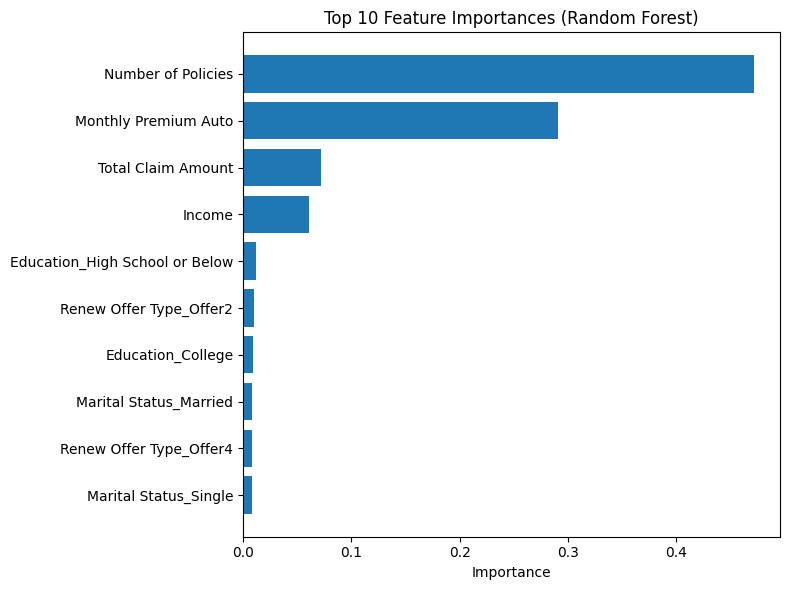

In [47]:
# Viualisasi 10 fitur paling berpengaruh

plt.figure(figsize=(8,6))
plt.barh(feat_imp_df['feature'].head(10)[::-1], feat_imp_df['importance'].head(10)[::-1])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

## 📈 Predicted vs Actual CLV
Visualisasi perbandingan prediksi model vs nilai aktual untuk mengevaluasi bias dan penyebaran error.


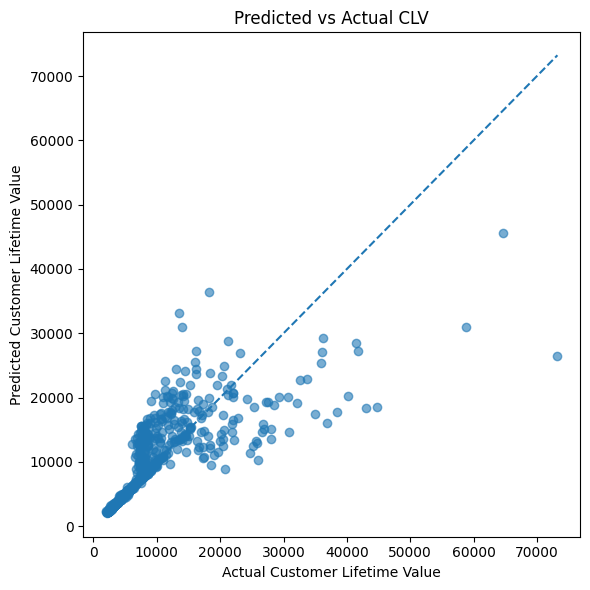

In [48]:
# Visualisasi perbandingan CLV yang sudah diprediksi
# Kita akan menggunakan pipeline terbaik RandomForest sebagai pembanding
y_pred_best = best_pipe.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel('Actual Customer Lifetime Value')
plt.ylabel('Predicted Customer Lifetime Value')
plt.title('Predicted vs Actual CLV')
plt.tight_layout()
plt.show()


## 🧭 Kesimpulan dan Rekomendasi

### 📌 Conclusion
Model terbaik yang dibangun adalah **Random Forest** (jika dilihat berdasarkan RMSE), dengan performa terbaik berdasarkan metrik evaluasi. Model mampu memprediksi nilai CLV pelanggan dengan akurasi yang dapat digunakan untuk keperluan segmentasi dan alokasi anggaran marketing.

### 💡 Recommendation
- Gunakan model ini untuk mengidentifikasi pelanggan bernilai tinggi dan tawarkan program loyalitas atau promo eksklusif.
- Lakukan update model secara berkala untuk mempertahankan akurasi prediksi.
- Gunakan hasil prediksi CLV untuk segmentasi pelanggan berbasis profitabilitas.

### ⚠️ Limitasi
- Dataset tidak mencakup data perilaku waktu (transaction frequency), sehingga pendekatan probabilistik seperti BG/NBD belum dapat diterapkan.
- Model hanya berlaku untuk populasi data dengan karakteristik serupa (domain asuransi).

### 🚀 Next Improvement
- Menambahkan data perilaku waktu (misal: tanggal transaksi, waktu transaksi).
